In [ ]:
협업 필터링 이란? 

영화를 추천 받고 싶을때 우리는 어떻게 할까요?
1. 내가 좋아하는 감독, 장르 , 키워드 의 영화를 찾아본다
2. 나랑 성향이 비슷한 친구들이 본 영화를 찾아본다. 
가 대표적인 방법일 것입니다.

이것은 
1. 내가 좋아하는 감도그장르 , 키워드의 영화를 찾아본다
 ▶Content Based Filtering # 교수왈 : 정확히 말하자면 contents based 임
2. 나랑 성향이 비슷한 친구들이 본 영화를 찾아본다.
 ▶협업 필터링 (Collaborative Filtering) # 교수왈 : 정확히 말하자면  user based 임
라고 할수 있습니다.

○ 협업 필터링 특징
가정 : 나와 비슷한 취향의 사람들이 좋아하는 것은 나도 좋아할 가능성이 높다
     -> 많은 사용자로 부터 얻은 취향정보를 활용
        
핵심 포인트 : "많은 사용자들" 로 부터 얻은 취향 정보를 활용
    - 사용자의 취향정보 = 집단지성
..

In [ ]:
메모리 기반 접근법(Memory-base-Approach) 

<User-based> #유저 기반 협업 필터링 
1번사람이 1번 , 3번 , 4 번 영화를 봤을때 
2번사람이 2번 영화를 받을때 

1 ,2 번 사람은 다른 그룹이다.

3번사람이 3번, 4번영화를 봤으면
1번 사람이랑 비슷한 영화를 봤기 때문에
이둘을 SIMILAR USERS 로 봐서 자신의 그룹에 속해있는
다른 사람이 본 영화를 추천해줌 
ex) 3번사람에게 1번 영화를 추천함. 

<Item-based>#컨텐츠 기반 협업 필터링 
1번사람이 1 ,3 영화를 , 
2번사람이 1 ,3 영화를 , 
3번사람이 3, 4 영화를 ,
영화를 SIMILAR ITEMS 로 봐서 
이때 3번 사람에게 1번 영화를 추천해줌 

In [ ]:
유사도 측정방법
○ 두 방법 모두 유사도(거리)를 측정하여 사용함 
○ 거리 측정방법은 다양함
    -사용자(행) , -아이템(열) 행렬을 사용함

○ 일반적인 거리 측정 방법론 
    ºCosine Similarity
    ºPeason Similarity
    ºEuclidean Distance

In [ ]:
Manhattan Distance # L1  #직각으로 해서 점으로 거리 측정
Euclidean Distance # L2  #점하고 바로 연결해 거리측정 
Cosine Similarity # 원점상에서 선을 이루면 그안에 사이각이 작으면 유사하고 , 각이 크면 다르다고 봄 

Cosine 하고 나머지 차이 == 유사성 vs 거리 


         영화 1    영화 2    영화 3    영화 4    영화 5                           유사도 행렬 (similarity Index) 
사람 1    9          6         8         4                  # 사람 4 - 사람 1 ->  0.4 
사람 2    2          10        6                   8        # 사람 4 - 사람 2 ->  0.9 
사람 3    5          9                   10        7        # 사람 4 - 사람 3 ->  0.7 
사람 4    ?          10        7         8         ?          

사람4 를 사람 1, 2, 3 의평점과 비교해 영화 1 ,5 의 평점을 예측한다. 


그래서  곱해줌  사람1_1영화 9 * 0.4 -> 3.6 
                사람2_1영화 2 * 0.9 -> 1.8
                사람3_1영화 5 * 0.7 -> 3.5
그뒤 합산. (행방향으로 )       결과 -> 8.9
  
나눠주면 4번사람 평균 계산 .
그다음 weight SUM 을 (0.4 + 0.9 +0.7)
그러면 이것이 평균 평점. (가중평균평점) (평균을 낼때 4번유저랑 비슷하면 더 많이 반영해주고 , 관련없는사람이면 조금만 반영)

계산후 4.4 점
(유사도를 곱한것의 합(3.6+1.8+3.5) / weightSUM(2.0))
8.9 % 2.0 ->  4.4 점

평점이 없는건 없는대로 계산

5번영화는 7.5 점


In [ ]:
Memory-based Approach 의 장단점

▶장점 
    최적화(Optimization) 나 훈련(Train)이 필요없음
    쉬운 접근 방식

▶단점
    희소(Sparse)데이터 경우 성능저하 (비교대상이 적으면, 성능저하 )
    확장성에 제한 ( 비교대상이 많아지면 계산량이 증가)
    콜드 스타트(Cold Start)- "새로 시작할떄의 곤란함"
    계산효율성 저하 
    롱테일(Long-Tail) 문제 - 파레토법칙, 되게 유명한상위20% 영화가 총 조회수에 80%를 차지한다. 
    (유명하고 덜유명한 영화사이에 불균형이 존재한다 )
    
    
    
▶극복방안
    1 콘텐츠 기반 필터링(Contents- Based Filtering)
        콘텐츠에 대한 분석을 기반으로 추천 ex) 영화-감독 , 장르 , 등장인물 등  /상품- 상품설명 , 종류 
    장점 : 많은 사용자의 행동 정보가 필요하지 X 
           콜드 스타트 문제 해소 가능
    단점 : 메타 정보의 한정성 : 상품의 프로파일을 모두 함축하는데 한계가 있음 -> 정밀성이 떨어짐
           개인의 성향을 세부적으로 파악하기 어려움
        

방법 : 1. 50명의 태거(Tagger)에 의해서 사람이 직접 콘텐츠의 태그를 담
        - 넷플릭스는 사람이 태그를 달아 콘텐츠를 5만 종으로 나눔
       2. 기계 학습 : 텍스트 마이닝으로 분석
        
        
- 하이브리드(Hybrid)추천 시스템
    협업 필터링, 콘텐츠 기반 필터링 을조합
        1 데이터 쌓이기 전 :  콘텐츠 기반필터링 통해 콜드스타트 문제 해결
        2 데이터 쌓이기 후 :  협업 필터링으로 추천의 정확성을 높임
            

In [115]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity  #양방향 안에 cosine similarity

In [136]:
# 카톡방에서 자료다운 (실제 데이터임)
anime = pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/anime.csv")
rating = pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/rating.csv")

In [117]:
anime  #members : 조회수 
# rating 

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [53]:
# -1이 아닌 모든 rating을 뽑을려할때 -1인걸 이렇게하면 True로 나오니 
rating["rating"] == -1 

47         False
81         False
83         False
101        False
153        False
           ...  
7813732    False
7813733    False
7813734    False
7813735    False
7813736    False
Name: rating, Length: 6337241, dtype: bool

In [137]:
#이렇게 해서 -1 가아닌 모든걸 뽑음 
rating = rating[rating["rating"] != -1]

rating[rating["rating"] != -1] #이게 필터mask 가 됨 

#이렇게 날리면 1번유저는 101개의 영화를 봐놓고 4개의 영화만 10점을줌. 
#봤는데 평점안준 나머지 97개는 데이터가 그냥날림. 
#-1을 그냥 날리면 1번유저처럼 유저에 대해서 취향파악이 안됨.

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


<Axes: >

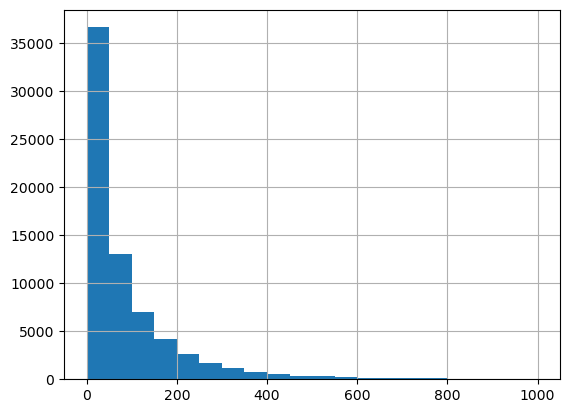

In [138]:
#사람들 기준     rating 을 평균 식별  
# rating.groupby("user_id")["rating"].mean()

#사람들 기준 rating의 종류별 개수 
view_per_user = rating.groupby("user_id")['rating'].count()
view_per_user.hist(bins = 20 ,         #히스토그램 그리고 bins -> 바를 20개로 설정
                   range =( 0, 1000 )) #range -> 간격 설정  (0~ 1000)


<Axes: >

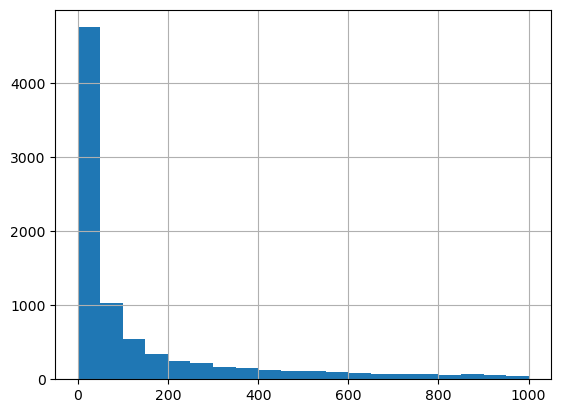

In [139]:
#애니메이션별로 사람들이 얼마나 봤는지. 

view_per_anime = rating.groupby("anime_id")['rating'].count()
view_per_anime.hist(bins = 20 , range =( 0, 1000 )) 


In [156]:
#적게본 컨텐츠 제거 
view_per_anime_df = pd.DataFrame(view_per_anime) #기존인덱스 저장 

popular_anime = view_per_anime_df[view_per_anime_df["rating"] >= 50].index #평가가 50개 이하인걸 제거 
popular_anime

Int64Index([    1,     5,     6,     7,     8,    15,    16,    17,    18,
               19,
            ...
            33372, 33421, 33524, 33558, 33569, 33606, 33964, 34085, 34103,
            34240],
           dtype='int64', name='anime_id', length=5172)

In [157]:
#20개 이상본 사람만 뽑아오기
view_per_user_df = pd.DataFrame(view_per_user) #기존 인덱스 저장 

viewers = view_per_user_df[view_per_user_df["rating"] >= 20].index
viewers

Int64Index([    3,     5,     7,    11,    12,    14,    17,    18,    19,
               21,
            ...
            73499, 73500, 73501, 73502, 73503, 73504, 73507, 73510, 73513,
            73515],
           dtype='int64', name='user_id', length=47153)

In [68]:
rating.iloc[viewers]

,user_id,anime_id,rating
101,1,15451,10
156,3,20,8
158,3,170,9
162,3,430,7
163,3,527,7
...,...,...,...
91690,946,12531,9
91693,946,12967,7
91696,946,13357,7
91699,946,13659,7


In [72]:
# viewers 목록속에 있는 것만 가져옴 그리고 rating자체를 필터링. 
filtered_rating = rating[rating["user_id"].isin(viewers)]
filtered_rating

,user_id,anime_id,rating
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9
...,...,...,...
7813730,73515,13659,8
7813731,73515,14345,7
7813732,73515,16512,7
7813733,73515,17187,9


In [77]:
#피봇테이블만듬. 
rating_matrix  = filtered_rating.pivot_table(index = "user_id",
                            columns = "anime_id",
                            values = "rating")
rating_matrix = rating_matrix.fillna(0) #Nan을 0으로 채움
rating_matrix #user 컨텐츠 행렬 

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73504,10.0,10.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73507,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
rating_matrix[rating_matrix.index == 7] 

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
similar_users(7 , rating_matrix).shape 

(1, 47152)

In [87]:
similar_users(7 , rating_matrix) #높으면 높을수록 유사한 상환 ,0~1사이의 값을가질것임  

array([[0.15364121, 0.24334171, 0.1535109 , ..., 0.14053912, 0.02099479,
        0.10326485]])

In [89]:
similar_users(7 , rating_matrix)[0]

array([0.15364121, 0.24334171, 0.1535109 , ..., 0.14053912, 0.02099479,
       0.10326485])

In [102]:
# 함수1 나와 취향이 비슷한 유형을 찾아주는 함수
def similar_users(user_id , matrix , k = 10): #유저아이디 , user콘텐츠 행렬 , 사람수
    user = matrix[matrix.index == user_id] #선택된 유저의 평가정보  
    other_user = matrix[matrix.index != user_id] #나머지 유저의 평가정보
    
    #코사인 유사도 계산  ◆여기서 이해 막힘◆
    similarity = cosine_similarity(user , other_user)[0] #유사도 값만 있음
    #다른 유저 ID index 생성   ◆여기서 이해 막힘◆
    other_user_list = other_user.index
    #다른 유저 와 유사도    ◆여기서 이해 막힘◆
    user_similarity = dict(zip( other_user_list , similarity )) #딕셔너리 형태로 다른유저 , 유사도 형태로 넣음
    user_similarity = pd.Series(user_similarity)

    #상위 K 명 찾기
    top_user = user_similarity.sort_values(ascending= False)[:k]
    return top_user
    
pd.Series(similar_users(7 , rating_matrix ))

1287     0.433745
17696    0.430103
65477    0.430008
20146    0.429461
40648    0.429372
44971    0.413130
34917    0.411826
60171    0.410811
61707    0.410040
18805    0.409579
dtype: float64

In [108]:
# 함수2 나와 취향비슷한 유형찾은걸 넣으면 , 안본영화 TOP 5, T0P10 같은걸 뽑아주는함수 

def recommend_contents(user_id , matrix ,k =10 , n = 10 ):
    top_user = similar_users(user_id , matrix , k = k)
    
    #성향이 비슷한 사용자의 사용자-콘텐츠 행렬
    u_c_matrix = matrix.loc[top_user.index]
    weighted_u_c_matrix =  u_c_matrix.apply(lambda x: x* top_user)
    score = weighted_u_c_matrix.sum()
    
    #안 본 콘텐츠 필터링 
    user = matrix.loc[user_id]
    nonwatch_score = score[user == 0]
    recom_contents = nonwatch_score.sort_values(ascending = False)[:n]
    return recom_contents
    
recommend_contents(7 , rating_matrix)

anime_id
13759    37.056194
5081     36.175650
15689    35.330452
10790    35.319132
23277    34.943991
28677    34.929084
8841     34.909092
6547     34.850119
6347     34.590149
22147    34.532640
dtype: float64

In [160]:
recom_list = recommend_contents(7 , rating_matrix , k=10, n=10)

anime_ = anime.set_index("anime_id")
anime_.loc[recom_list.index]

,name,genre,type,episodes,rating,members
anime_id,,,,,,
13759,Sakurasou no Pet na Kanojo,"Comedy, Drama, Romance, School, Slice of Life",TV,24,8.40,380375
5081,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire",TV,15,8.39,482268
15689,Nekomonogatari: Kuro,"Comedy, Romance, Supernatural",TV,4,8.06,173264
10790,Kore wa Zombie Desu ka? of the Dead,"Action, Comedy, Ecchi, Harem, Magic, Supernatural",TV,10,7.78,180032
23277,Saenai Heroine no Sodatekata,"Comedy, Ecchi, Harem, Romance, School",TV,12,7.69,155795
28677,Yamada-kun to 7-nin no Majo (TV),"Comedy, Harem, Mystery, Romance, School, Shoun...",TV,12,7.91,193566
8841,Kore wa Zombie Desu ka?,"Action, Comedy, Ecchi, Harem, Magic, Supernatural",TV,12,7.67,295782
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
6347,Baka to Test to Shoukanjuu,"Comedy, Romance, School, Super Power",TV,13,7.83,301282
